In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

train_data.head()


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape


(42000, 785)

In [4]:
test_data.shape

(28000, 784)

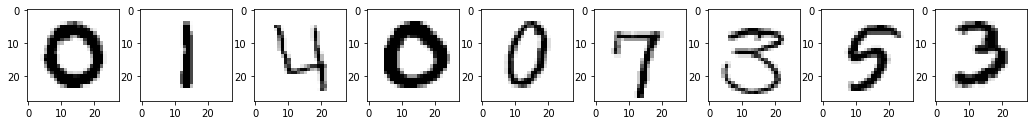

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(1,10):
    q=train_data.iloc[i:i+1,1:].values
    plt.subplot(10,10,i)
  #Assuming these are square images
  #sqrt of 784 is 28
    plt.imshow(q.reshape(28,28),cmap=plt.cm.binary)

In [6]:
train_data.describe

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

     

In [7]:
test_data.describe

<bound method NDFrame.describe of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0      

In [8]:
train_data = train_data.sample(frac=1)
test_data = test_data.sample(frac=1)

In [9]:
width, height = 28, 28



train_y = train_data.pop('label').values.astype('int32')
train_x = train_data.astype('int32').values.reshape(-1, width, height,1)

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.1, random_state=1, shuffle=False)
test_y = test_data.values.reshape(-1, width, height,1)
test_x = test_data.values.reshape(-1, width, height,1)


print(train_y.shape, train_x.shape, valid_x.shape, valid_y.shape, test_y.shape, test_x.shape)

(37800,) (37800, 28, 28, 1) (4200, 28, 28, 1) (4200,) (28000, 28, 28, 1) (28000, 28, 28, 1)


2022-10-17 10:31:41.650533: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-17 10:31:41.945062: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1182/1182 [==============================] - 45s 37ms/step - loss: 0.6593 - accuracy: 0.8278 - val_loss: 0.3033 - val_accuracy: 0.9064
Epoch 2/20
1182/1182 [==============================] - 44s 37ms/step - loss: 0.1583 - accuracy: 0.9516 - val_loss: 0.1945 - val_accuracy: 0.9402
Epoch 3/20
1182/1182 [==============================] - 43s 37ms/step - loss: 0.1173 - accuracy: 0.9631 - val_loss: 0.1561 - val_accuracy: 0.9519
Epoch 4/20
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0991 - accuracy: 0.9691 - val_loss: 0.1077 - val_accuracy: 0.9676
Epoch 5/20
1182/1182 [==============================] - 45s 38ms/step - loss: 0.0827 - accuracy: 0.9745 - val_loss: 0.1178 - val_accuracy: 0.9664
Epoch 6/20
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0749 - accuracy: 0.9762 - val_loss: 0.0850 - val_accuracy: 0.9717
Epoch 7/20
1182/1182 [==============================] - 45s 38ms/step - loss: 0.0660 - accuracy: 0.9785 - val_loss: 0.1230 -

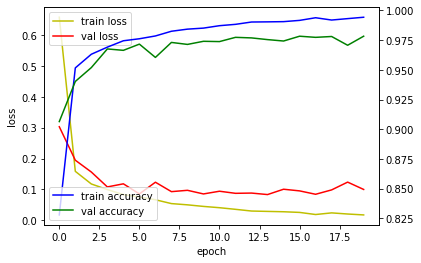

In [10]:
# model create
inputs = tf.keras.Input(shape=(train_x.shape[1:]))
x = tf.keras.layers.Conv2D(filters=56, kernel_size=(3,3), strides=1, padding='same', activation='selu')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same', strides=None)(x)
x = tf.keras.layers.Conv2D(filters=112, kernel_size=(3,3), strides=1, padding='same', activation='selu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same', strides=None)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

es = EarlyStopping(monitor = 'valid_loss', min_delta = 0.001, patience = 3, verbose=1, mode = 'auto', restore_best_weights = True)

hist = model.fit(train_x,train_y,epochs=20, callbacks=[es], validation_data=(valid_x, valid_y))




%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

##test

result_y = model.predict(test_x)

classes = np.argmax(result_y,axis = 1) 

sample_submission['Label'] = classes

sample_submission.to_csv('submission.csv',index=False)